In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.io import loadmat
from skimage import color 
from skimage import io 
from sklearn.model_selection import train_test_split
%matplotlib inline 
plt.rcParams['figure.figsize'] = (16.0 , 4.0)

In [27]:
def load_data(path):
    data = loadmat(path)
    return data['X'],data['y']
X_train ,y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
X_test,y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")
print("Training ",X_train.shape,y_train.shape)
print("Test",X_test.shape,y_test.shape)

Training  (32, 32, 3, 73257) (73257, 1)
Test (32, 32, 3, 26032) (26032, 1)


In [28]:
X_train ,y_train = X_train.transpose((3,0,1,2)) , y_train[:,0]
X_test,y_test = X_test.transpose((3,0,1,2)) , y_test[:,0]

In [29]:
print("Training ",X_train.shape,y_train.shape)
print("Test",X_test.shape,y_test.shape)

Training  (73257, 32, 32, 3) (73257,)
Test (26032, 32, 32, 3) (26032,)


In [30]:
# Replace label '10' with '0' in both y_train and y_test
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels (for 10 classes: digits 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print the shapes after processing
print("X_train shape after normalization:", X_train.shape)
print("y_train shape after one-hot encoding:", y_train.shape)



X_train shape after normalization: (73257, 32, 32, 3)
y_train shape after one-hot encoding: (73257, 10)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer (10 classes for digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=3, 
                    validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 101s 88ms/step - accuracy: 0.8600 - loss: 0.4674 - val_accuracy: 0.8906 - val_loss: 0.3868
Epoch 2/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 99s 86ms/step - accuracy: 0.8689 - loss: 0.4448 - val_accuracy: 0.8917 - val_loss: 0.3842
Epoch 3/3
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 103s 89ms/step - accuracy: 0.8770 - loss: 0.4145 - val_accuracy: 0.8975 - val_loss: 0.3637
814/814 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8964 - loss: 0.3743
Test Accuracy: 89.75%


In [34]:
# Train the model using augmented data
# Train the model using augmented data
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=5, validation_data=(X_test, y_test))



Epoch 1/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 101s 87ms/step - accuracy: 0.8798 - loss: 0.4098 - val_accuracy: 0.8984 - val_loss: 0.3600
Epoch 2/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 99s 86ms/step - accuracy: 0.8830 - loss: 0.3927 - val_accuracy: 0.9027 - val_loss: 0.3412
Epoch 3/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 100s 87ms/step - accuracy: 0.8871 - loss: 0.3799 - val_accuracy: 0.9010 - val_loss: 0.3509
Epoch 4/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 99s 87ms/step - accuracy: 0.8891 - loss: 0.3765 - val_accuracy: 0.9086 - val_loss: 0.3258
Epoch 5/5
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 100s 87ms/step - accuracy: 0.8919 - loss: 0.3625 - val_accuracy: 0.9055 - val_loss: 0.3342


In [35]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


814/814 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9034 - loss: 0.3426
Test accuracy: 0.9055


814/814 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


Enter the number of images to display:  8


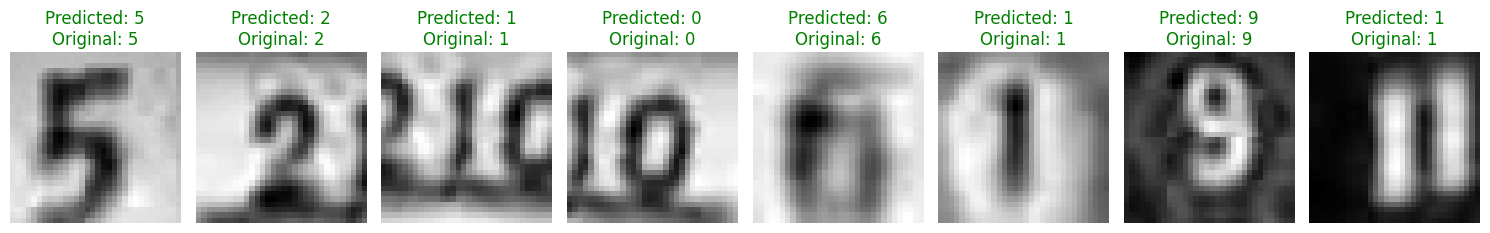

In [43]:
import matplotlib.pyplot as plt
from skimage import color
import numpy as np

# Predict the labels for the test set
y_pred = model.predict(X_test)  # Model predictions
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels (0-9)

# Convert one-hot encoded y_test to true labels
y_true = np.argmax(y_test, axis=1)  # True labels from y_test

def display_images(num_images):
    # Convert the images to grayscale for better visualization
    X_test_gray = color.rgb2gray(X_test)

    # Ensure the input number of images is valid
    if num_images > len(X_test):
        print(f"Number exceeds the total test images ({len(X_test)}). Showing {len(X_test)} images instead.")
        num_images = len(X_test)

    # Display the specified number of test images with predicted and actual labels
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        plt.subplot(1, num_images, i+1)  # Create a dynamic grid based on the input
        plt.imshow(X_test_gray[i], cmap='gray')  # Display image in grayscale
        plt.axis('off')  # Turn off axis
        plt.title(f"Predicted: {y_pred[i]}\nOriginal: {y_true[i]}", 
                  color='green' if y_pred[i] == y_true[i] else 'red')  # Green if correct, red if wrong

    plt.tight_layout()
    plt.show()

# Ask for user input on how many images to display
num_images = int(input("Enter the number of images to display: "))
display_images(num_images)
